# LEAD SCORE

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 


* The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


* Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’

#### The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted

## 1. IMPORT LIBRARIES

In [1]:
import warnings

warnings.filterwarnings('ignore')  # Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. READING AND UNDERSTANDING DATA


In [3]:
# Read the data and store it in "score" variable.
score = pd.read_csv("C:/Users/suvandhana/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")

In [4]:
score.head()  # check the data stored in 'score' variable

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
score.shape  # number of rows and columns in score data.

(9240, 37)

In [6]:
score.iloc[1]

Prospect ID                                      2a272436-5132-4136-86fa-dcc88c88f482
Lead Number                                                                    660728
Lead Origin                                                                       API
Lead Source                                                            Organic Search
Do Not Email                                                                       No
Do Not Call                                                                        No
Converted                                                                           0
TotalVisits                                                                         5
Total Time Spent on Website                                                       674
Page Views Per Visit                                                              2.5
Last Activity                                                            Email Opened
Country                                               

###### Note: There are 9240 rows and 37 columns in the dataset

In [7]:
score.info()  #checking datatypes of every column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
score.describe()  # checking the numeric column statistical analysis(mean,median,standard deviation etc..,)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Statistical Analysis of all numeric columns 

## 3. DATA CLEANING

In [9]:
score.isnull().sum().sort_values(ascending=False) #check for missing values.

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [10]:
round(100*(score.isnull().sum()/len(score.index)), 2)  # check the percentage of missing values.

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

* There are 50% missing values in the data. As we can see 4K rows are missing values. So try to handle this missing values.


* And there are unwanted columns also in the dataset which may not be useful. Those unwanted columns can be required if we have Visulaization techniques. But here in the case study it doesnt required for model building so try to remove those columns.

In [11]:
for col in score.columns:
    if score[col].isnull().sum()>3000:
        score.drop(col,axis=1,inplace=True)

###### Note: In the dataset we have 'ProspectID' and 'Lead number' column which was used for identification of person. So here while doing, it is not required like a roll number of a person.

In [12]:
score.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)  # 'Lead Number' and 'Prospect ID' column are not required drop them.

In dataset we have 'Select' value which was considered as Null values. So try to handle them properly.

In [13]:
for x in score.columns:
    print(score[x].value_counts())
    print("\n\n\n\n")

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64





Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
blog                    1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
testone                 1
youtubechannel          1
welearnblog_Home        1
Name: Lead Source, dtype: int64





No     8506
Yes     734
Name: Do Not Email, dtype: int64





No     9238
Yes       2
Name: Do Not Call, dtype: int64





0    5679
1    3561
Name: Converted, dtype: int64





0.0      2189
2.0      1680
3.0      1306


In [14]:
score.drop(['Lead Profile', 'How did you hear about X Education'],axis=1,inplace=True) # remove 2 columns because they also have high number of missing values.

Here we can see there are so many columns which has "NO" in all records. So there is no variance between those data, which was not useful for model building. Try to delete those columns.

In [15]:
# Columns which doesn't has variance in the score dataframe.
unwanted = ['Do Not Call','Search','Magazine','Digital Advertisement','Newspaper Article','X Education Forums','Newspaper','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','What matters most to you in choosing a course']
score.drop(columns=unwanted,axis=1,inplace=True)

In [16]:
# Now try to check missing values.
score.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Country                                   2461
Specialization                            1438
City                                      1420
Page Views Per Visit                       137
TotalVisits                                137
Last Activity                              103
Lead Source                                 36
Last Notable Activity                        0
A free copy of Mastering The Interview       0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
dtype: int64

In [17]:
# Instead of imputing the current occupation column with mode or value_counts(). Try to remove that rows.

score = score[~pd.isnull(score['What is your current occupation'])]

In [18]:
# Now try to check missing values.
score.isnull().sum().sort_values(ascending=False)

Country                                   1605
Page Views Per Visit                       130
TotalVisits                                130
Last Activity                              103
Lead Source                                 36
Specialization                              18
Last Notable Activity                        0
A free copy of Mastering The Interview       0
City                                         0
What is your current occupation              0
Total Time Spent on Website                  0
Converted                                    0
Do Not Email                                 0
Lead Origin                                  0
dtype: int64

Country and city column are not useful for model building, because the business is online mode. so try to remove those columns, here country doesnt matter.

In [19]:
score.drop(['Country','City'],axis=1,inplace=True)# remove country column

In [20]:
# check for missing values
score.isnull().sum().sort_values(ascending=False)

Page Views Per Visit                      130
TotalVisits                               130
Last Activity                             103
Lead Source                                36
Specialization                             18
Last Notable Activity                       0
A free copy of Mastering The Interview      0
What is your current occupation             0
Total Time Spent on Website                 0
Converted                                   0
Do Not Email                                0
Lead Origin                                 0
dtype: int64

In [21]:
# remove missing rows for page views per visit
score = score[~pd.isnull(score['Page Views Per Visit'])]

In [22]:
# check for missing values
score.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Origin                                0
dtype: int64

In [23]:
# remove missing rows for lead source
score = score[~pd.isnull(score['Lead Source'])]

In [24]:
# checl for missing values
score.isnull().sum().sort_values(ascending=False)

Specialization                            18
Last Notable Activity                      0
A free copy of Mastering The Interview     0
What is your current occupation            0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Email                               0
Lead Source                                0
Lead Origin                                0
dtype: int64

In [25]:
# remove missing values rows for specialization column.
score = score[~pd.isnull(score['Specialization'])]

In [26]:
# checl for missing values
score.isnull().sum().sort_values(ascending=False)

Last Notable Activity                     0
A free copy of Mastering The Interview    0
What is your current occupation           0
Specialization                            0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Email                              0
Lead Source                               0
Lead Origin                               0
dtype: int64

In [27]:
# print top 5 rows
score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [28]:
# check the shape
score.shape

(6373, 12)

There are 'yes' and 'no' Values in 2 columns. Try to replace them with 0'S and 1'S in the dataframe, Beacuse we need to convert categorical values to numeric while doing model building.

In [29]:
# 2 columns which has categorical values as 'Yes' and 'No'.
var = ['Do Not Email','A free copy of Mastering The Interview']

def bin_v(x): 
    score[x] = score[x].map({'Yes':1,'No':0})
    
for x in var:
    bin_v(x)

In [30]:
# top rows
score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,0,Modified


## EDA

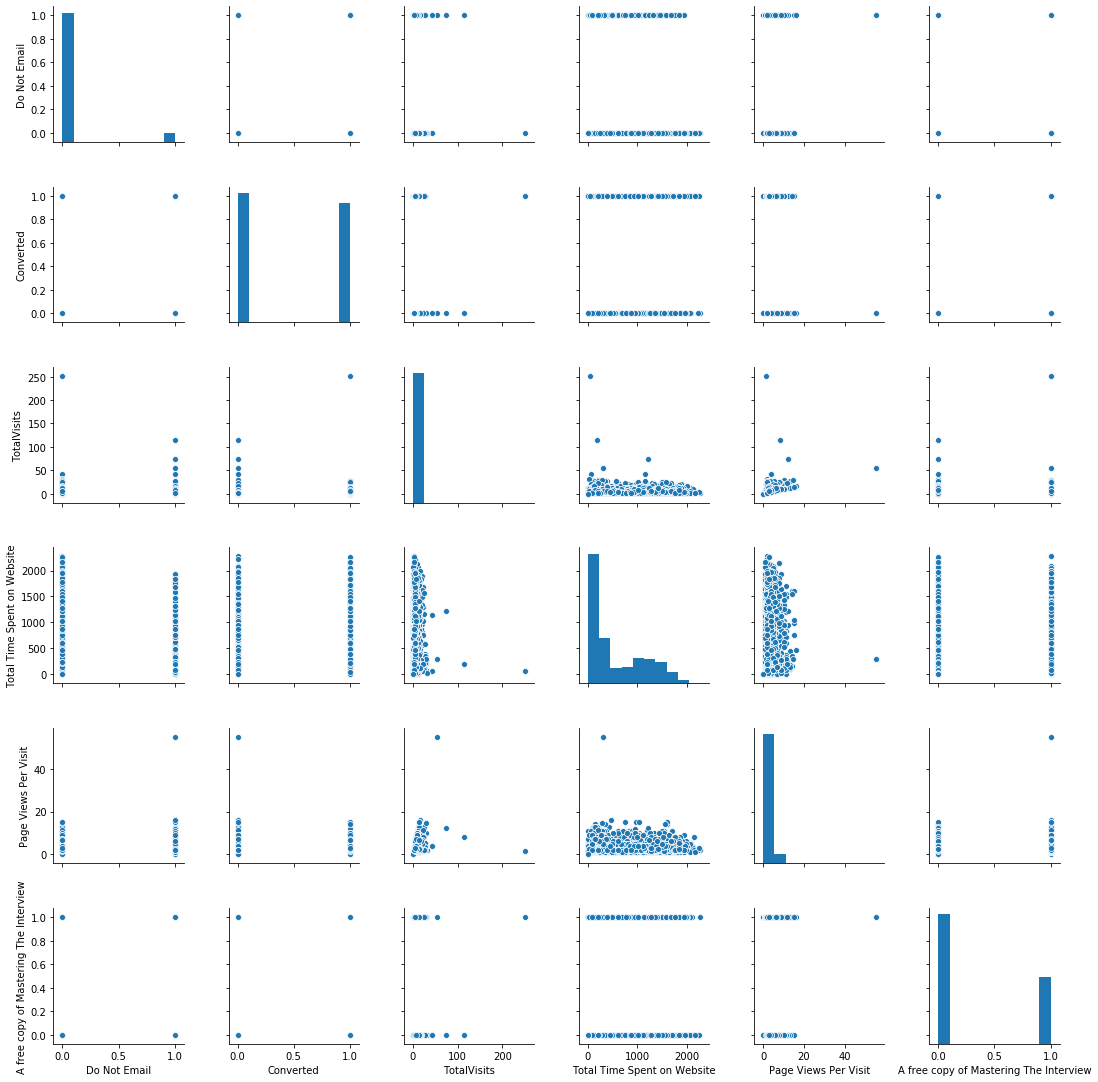

In [31]:
sns.pairplot(score)
plt.show()

## 4. DUMMY VARIABLE CREATION

* Create dummy variables for Categoircol columns and remove First column.


* As we know in dummy variables if there are n levels we need to take (n-1) columns as dummy variables.

In [32]:
# Try to extract Categorical columns to one variable.

dum_var = score.select_dtypes(exclude=['int64','float64'])
dum_var.columns


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [33]:
y = dum_var.drop(['Specialization'],axis=1)

In [34]:
# Create dummies for categorical columns and drop the first column.
x = pd.get_dummies(score[y.columns],drop_first = True)
x.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
spec_dum = pd.get_dummies(score['Specialization'])
spec_dum

,"Banking, Investment And Insurance",Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Operations Management,Retail Management,Rural and Agribusiness,Select,Services Excellence,Supply Chain Management,Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9235,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9237,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
spec_dum = spec_dum.drop(['Select'],axis=1,inplace=True)

In [37]:
# Concatenate dummy dataframes to score dataframe.
score = pd.concat([score,x],axis = 1)
score = pd.concat([score,spec_dum],axis=1)

In [38]:
# top rows
score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [39]:
#Drop the columns in which one hot encoding is done.
score.drop(columns=dum_var,axis=1,inplace=True)

In [40]:
# shape of dataframe
score.shape

(6373, 57)

## 5. TRAIN TEST SPLIT

In [41]:
from sklearn.model_selection import train_test_split #import sklearn library for train and test split.

In [42]:
 #x variable(which are independent variables(feature)
# y variable(which is dependent variable(target variable))



x = score.drop(['Converted'],axis=1)
y = score['Converted']

In [43]:
x.head() # top rows

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

## 6. SCALING

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Do scaling for numeric variables that is int and float variables. For remaining variables we have O and 1 like they are scaled before.

scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,0.015936,0.029489,0.125,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
218,0,0.015936,0.082306,0.250,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4171,0,0.023904,0.034331,0.375,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4037,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0,0.000000,0.000000,0.000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


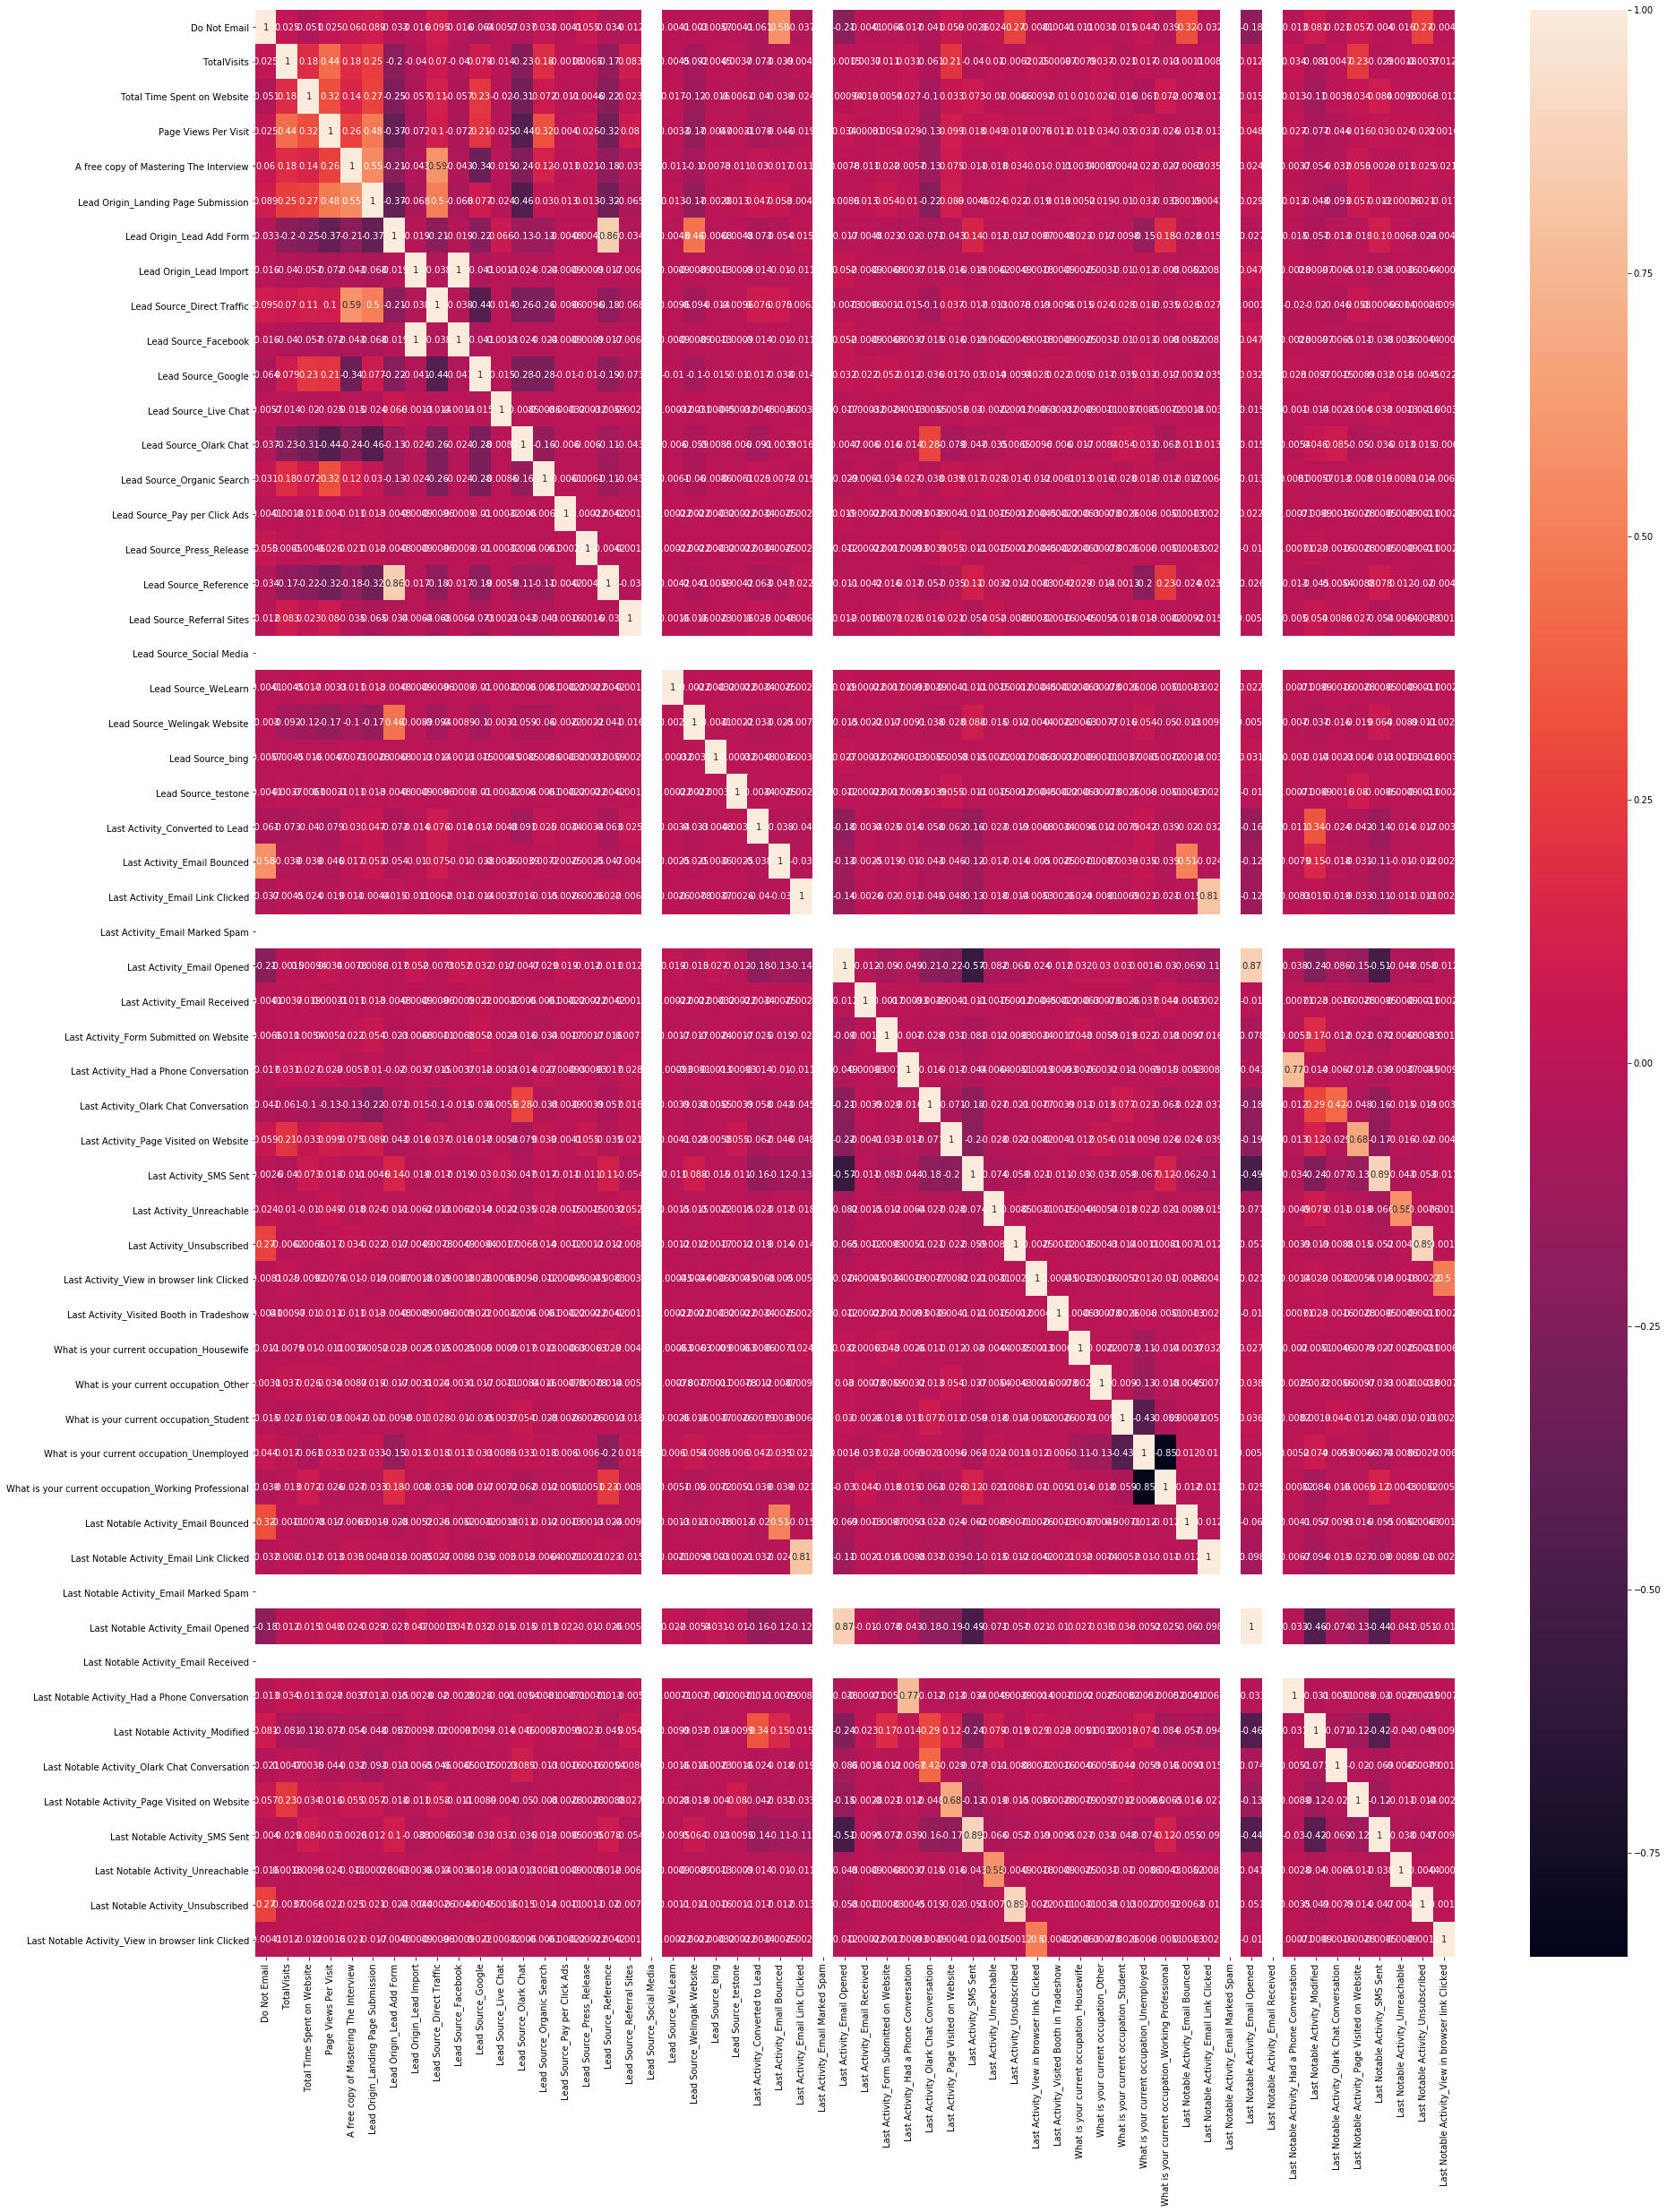

In [47]:
plt.figure(figsize = (30,40))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

## 7. Model building

In [48]:
from sklearn.linear_model import LogisticRegression # import libraries
import statsmodels.api as sm
logreg = LogisticRegression()

In [49]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)  # fit the model

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # list out the rfe columns

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 38),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Source_Direct Traffic', False, 7),
 ('Lead Source_Facebook', False, 33),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Live Chat', False, 30),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 14),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 35),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 41),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 13),
 ('Lead Source_testone', False, 19),
 ('Last Activity_Converted to Lead', False, 9),
 ('Last Activity_Email 

In [51]:
col = X_train.columns[rfe.support_] # store rfe variables in one variable.

In [52]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_testone', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'La

In [53]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8003,0,0.015936,0.029489,0.125,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
218,0,0.015936,0.082306,0.250,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4171,0,0.023904,0.034331,0.375,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4037,0,0.000000,0.000000,0.000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3660,0,0.000000,0.000000,0.000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:
X_train_rfe = X_train[col]  # create the x_train_rfe dataframe for x_train columns

In [55]:
X_train_sm = sm.add_constant(X_train_rfe)        # Add constant for x_train
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())  # Use GLM() object for logistic regression x_train and y_train  
res = logm2.fit()  # fit the model
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sat, 05 Feb 2022   Deviance:                       4145.5
Time:                        21:54:57   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
Do Not Email                                            -1.5053      0.193     -7.781      0.000      -1.884      -1.126
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [56]:

# check the VIF value for feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,84.19
5,Lead Source_Reference,65.18
6,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
2,Total Time Spent on Website,2.38
1,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [57]:
# Drop the column because it has high p-value.

X_train_rfe.drop(['Lead Source_Reference'],axis=1,inplace=True)

In [58]:
# After removing column try to view the model.
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sat, 05 Feb 2022   Deviance:                       4146.5
Time:                        21:54:58   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
Do Not Email                                            -1.5036      0.193     -7.779      0.000      -1.882      -1.125
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [59]:
# check vif value.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
2,Total Time Spent on Website,2.38
3,Lead Origin_Lead Add Form,1.71
1,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33


In [60]:
#Drop the column because it has highest p-value.

X_train_rfe.drop(['What is your current occupation_Housewife'],axis=1,inplace=True)

In [61]:
# After removing column try to predict the model summary
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.5
Date:                Sat, 05 Feb 2022   Deviance:                       4150.9
Time:                        21:54:58   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4519      0.554     -0.816      0.414      -1.537       0.633
Do Not Email                                            -1.5061      0.194     -7.783      0.000      -1.885      -1.127
TotalVisits                                             11.1469      2.667      4.179      0.000       5.919      16.375
Total Time Spent on Website                              4.4291      0.185     23.922      0.000       4.066       4.792
Lead Origin_Lead Add Form                                4.2058      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4532      0.122     11.932      0.000       1.215       1.692
Lead Source_Welingak Website                             2.1542      1.037      2.078      0.038       0.122       4.186
Last Activity_Had a Phone Conversation                   1.0400      0.983      1.058      0.290      -0.886       2.966
Last Activity_SMS Sent                                   1.1824      0.082     14.360      0.000       1.021       1.344
What is your current occupation_Student                 -1.7030      0.588     -2.894      0.004      -2.856      -0.550
What is your current occupation_Unemployed              -1.8892      0.550     -3.437      0.001      -2.967      -0.812
What is your current occupation_Working Professional     0.7255      0.581      1.249      0.212      -0.413       1.864
Last Notable Activity_Had a Phone Conversation          22.1951   1.26e+04      0.002      0.999   -2.47e+04    2.48e+04
Last Notable Activity_Unreachable                        2.7844      0.807      3.449      0.001       1.202       4.367
========================================================================================================================
"""

In [62]:
#Drop the column because it has highest p-value.

X_train_rfe.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1,inplace=True)

In [63]:
# After removing column try to predict the model summary
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sat, 05 Feb 2022   Deviance:                       4156.7
Time:                        21:54:58   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
Do Not Email                                            -1.5063      0.193     -7.785      0.000      -1.886      -1.127
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.64
2,Total Time Spent on Website,2.37
3,Lead Origin_Lead Add Form,1.70
1,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
10,What is your current occupation_Working Profes...,1.56
4,Lead Source_Olark Chat,1.44
5,Lead Source_Welingak Website,1.33
0,Do Not Email,1.09
8,What is your current occupation_Student,1.09


In [65]:
X_train_rfe.drop(['What is your current occupation_Working Professional'],axis=1,inplace=True)

In [66]:
# After removing column try to predict the model summary
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sat, 05 Feb 2022   Deviance:                       4158.1
Time:                        21:54:58   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
Do Not Email                                  -1.5037      0.193     -7.774      0.000      -1.883      -1.125
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = X_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
2,Total Time Spent on Website,2.00
1,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Olark Chat,1.33
5,Lead Source_Welingak Website,1.30
0,Do Not Email,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


## 8. TRAIN SET BUILDING.

In [68]:
# try to predict values of train set by using predict() function.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [69]:
# From above result try to get the last column values. so reshape them like an array.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30011695, 0.14200165, 0.12762885, 0.29155814, 0.95479546,
       0.19442563, 0.17807328, 0.94946006, 0.07599465, 0.98231619])

In [70]:
#create dataframe final for actual converted values and predicted values.
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,converted,Converted_Prob
0,0,0.300117
1,0,0.142002
2,1,0.127629
3,1,0.291558
4,1,0.954795


In [71]:
# map the converted_prob as 0 and 1 based on cutoff and store them in predicted column.
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,converted,Converted_Prob,predicted
0,0,0.300117,0
1,0,0.142002,0
2,1,0.127629,0
3,1,0.291558,0
4,1,0.954795,1


In [72]:
from sklearn import metrics

In [73]:
# Lets build the confusion Matrix

#                   Predicted
    
# Actual         True Negatives    False positives

  #              False Negatives   True Positives

In [74]:

# build confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


### Accuracy = ((TN+TP)/(TN+FP+FN+TP))

In [75]:
# Find out the Accuracy
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7886124187401928


In [76]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

###  sensitivity = (TP/TP+FN)

In [77]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.739413680781759

###  specificity = (TN/TN+FP)

In [78]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343425605536332

### False positive rate = FP/TN+FP

In [79]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1656574394463668


### positive predicted value = TP/TP+FP

In [80]:
# positive predictive value 
print (TP / float(TP+FP))

0.8057809330628803


In [81]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7750100441944556


## ROC CURVE

In [82]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

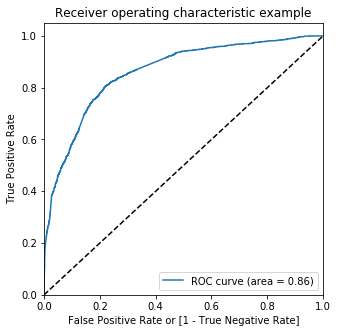

In [84]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.Converted_Prob)

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527012  0.994416  0.092561
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791975  0.810610  0.774654
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735037  0.543509  0.913062
0.8   0.8  0.711500  0.453234  0.951557
0.9   0.9  0.644026  0.279665  0.982699


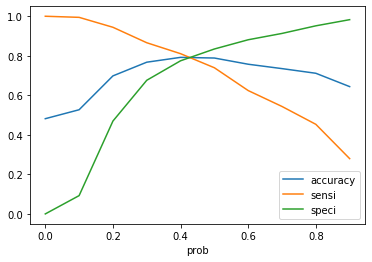

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
# Here optimal cutoff is 0.65 now try to predict by using these cutoff.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300117,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.142002,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127629,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291558,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.954795,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# After using optimal cutoff try to find accuracy
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [90]:
# Build confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion2

array([[1823,  489],
       [ 444, 1705]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.793392275476966

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.7884948096885813

In [94]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.21150519031141868


In [95]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7771194165907019


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.80414644905161


## 9. PRECISION AND RECALL

 There are some other metrics which are similar to sensitivity and specificity that are precision and recall. which was used in industry applications in place of sensitivity and specificity.

In [97]:
# build confusion matrix.
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[1929,  383],
       [ 560, 1589]], dtype=int64)

In [98]:
# Lets find Precision value.
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8057809330628803

In [99]:
# Lest find Recall value
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.739413680781759

In [100]:
# Import metrics and find built in precision and recall value.
from sklearn.metrics import precision_score, recall_score

In [101]:
# Precision value
precision_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.8057809330628803

In [102]:
# recall value
recall_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.739413680781759

In [103]:
# Try to plot the curve for precision and recall
from sklearn.metrics import precision_recall_curve

In [104]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.Converted_Prob)

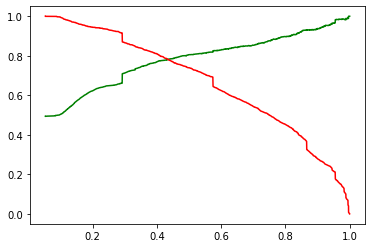

In [105]:
# plot the graph.
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 10. Making predictions on TEST data

In [106]:
# make fit_transform on Test data.Make scaling for numeric columns.

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4771,0,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6122,0,0.094595,0.029294,0.127273,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9202,0,0.054054,0.420328,0.072727,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6570,1,0.040541,0.382157,0.054545,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2668,0,0.108108,0.398580,0.072727,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [107]:
# consider the columns which we got finally at train set
col2 = X_train_rfe.columns
X_test = X_test[col2]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Unreachable
4771,0,0.000000,0.000000,1,0,0,0,1,0,0,0
6122,0,0.094595,0.029294,0,0,0,0,0,0,1,0
9202,0,0.054054,0.420328,0,0,0,0,1,0,1,0
6570,1,0.040541,0.382157,0,0,0,0,1,0,1,0
2668,0,0.108108,0.398580,0,0,0,0,1,0,1,0


In [108]:
# Add constant for X_test features.
X_test_sm = sm.add_constant(X_test)

In [109]:
# Predict the values from features.
y_test_pred = res.predict(X_test_sm)

In [110]:
# Get first 10 values by slicing.
y_test_pred[:10]

4771    0.996296
6122    0.239351
9202    0.786950
6570    0.373668
2668    0.859736
4233    0.792250
3368    0.751267
9091    0.696186
5972    0.328252
3631    0.864572
dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Let's see the head
y_pred_1.head()

,0
4771,0.996296
6122,0.239351
9202,0.786950
6570,0.373668
2668,0.859736


In [113]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [114]:
# Reset the index so index column will be dropped.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [115]:
# concatenate two columns to final dataframe.
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [116]:
# top 5 rows
y_pred_final.head()

,Converted,0
0,1,0.996296
1,0,0.239351
2,0,0.786950
3,1,0.373668
4,1,0.859736


In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [118]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Converted_Prob
0,1,0.996296
1,0,0.239351
2,0,0.786950
3,1,0.373668
4,1,0.859736


In [119]:
# Use the cutoff we got at train set and make predictions.

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [120]:
# Lets see the head
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.996296,1
1,0,0.239351,0
2,0,0.786950,1
3,1,0.373668,0
4,1,0.859736,1


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7599372384937239

In [122]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[688, 308],
       [151, 765]], dtype=int64)

In [123]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
#lets calculate sensitivity
TP / float(TP+FN)

0.8351528384279476

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.6907630522088354

so there is somewhat difference with this cutoff lets increase the cutoff and see the values in test set

In [126]:


y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [127]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,1,0.996296,1
1,0,0.239351,0
2,0,0.786950,1
3,1,0.373668,0
4,1,0.859736,1


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.770397489539749

In [129]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[741, 255],
       [184, 732]], dtype=int64)

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
#lets calculate sensitivity
TP / float(TP+FN)

0.7991266375545851

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.7439759036144579